In [2]:
from google.colab import drive
drive.mount("/content/drive/")


Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


In [3]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [4]:
import plotly
import cufflinks as cf
cf.go_offline()

import plotly.io as pio
pio.renderers.default = "colab"

In [5]:
import os
filepath = os.path.join('/content/drive/MyDrive/My Notebooks/MY_2022 ML DS Master Class/01-Linear Regression/', 'Advertising.csv')


In [6]:
df = pd.read_csv(filepath)


In [7]:
df.head()

,TV,radio,newspaper,sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9


## Polynomial Regression

**From Preprocessing, import PolynomialFeatures, which will help us transform our original data set by adding polynomial features**

We will go from the equation in the form (shown here as if we only had one x feature):

$$\hat{y} = \beta_0 + \beta_1x_1 + \epsilon $$

and create more features from the original x feature for some *d* degree of polynomial.

$$\hat{y} = \beta_0 + \beta_1x_1 + \beta_1x^2_1 +  ... + \beta_dx^d_1 + \epsilon$$

Then we can call the linear regression model on it, since in reality, we're just treating these new polynomial features x^2, x^3, ... x^d as new features. Obviously we need to be careful about choosing the correct value of *d* , the degree of the model. Our metric results on the test set will help us with this!

**The other thing to note here is we have multiple X features, not just a single one as in the formula above, so in reality, the PolynomialFeatures will also take *interaction* terms into account for example, if an input sample is two dimensional and of the form [a, b], the degree-2 polynomial features are [1, a, b, a^2, ab, b^2].**

In [8]:
X = df.drop('sales',axis=1)
y= df['sales']

In [9]:
from sklearn.preprocessing import PolynomialFeatures

In [10]:
polynomial_model = PolynomialFeatures(degree=2,include_bias=False) # a feature converter

In [11]:
polynomial_model.fit(X)

PolynomialFeatures(include_bias=False)

In [12]:
poly_features = polynomial_model.transform(X)

In [17]:
poly_features.shape

(200, 9)

In [19]:
X.shape

(200, 3)

In [20]:
X.iloc[0]

TV           230.1
radio         37.8
newspaper     69.2
Name: 0, dtype: float64

In [21]:
poly_features[0]

array([2.301000e+02, 3.780000e+01, 6.920000e+01, 5.294601e+04,
       8.697780e+03, 1.592292e+04, 1.428840e+03, 2.615760e+03,
       4.788640e+03])

In [16]:
polynomial_model.fit_transform(X)

## Train | Test Split

Make sure you have watched the Machine Learning Overview videos on Supervised Learning to understand why we do this step

In [ ]:
# Now we'll work in the poly_features. Cause newly poly features is created base on original data set will more features.


In [23]:
from sklearn.model_selection import train_test_split

In [47]:
X_train, X_test, y_train, y_test = train_test_split(poly_features, y, test_size=0.3, random_state=101)
#now my x is polynomially created feature 

In [48]:
from sklearn.linear_model import LinearRegression

In [49]:
model = LinearRegression(fit_intercept=True)

In [50]:
model.fit(X_train, y_train)

LinearRegression()

In [51]:
test_pradict = model.predict(X_test)

In [52]:
model.coef_

array([ 5.17095811e-02,  1.30848864e-02,  1.20000085e-02, -1.10892474e-04,
        1.14212673e-03, -5.24100082e-05,  3.34919737e-05,  1.46380310e-04,
       -3.04715806e-05])

In [53]:
from sklearn.metrics import mean_absolute_error,mean_squared_error

In [54]:
mae = mean_absolute_error(y_test, test_pradict)

In [55]:
mse = mean_squared_error(y_test,test_pradict)

In [56]:
rmse = np.sqrt(mse)

In [57]:
print("MAE: ",mae)
print("MSE: ",mse)
print("RMSE: ",rmse)

MAE:  0.48967980448038373
MSE:  0.4417505510403753
RMSE:  0.6646431757269274


### Comparison with Simple Linear Regression

**Results on the Test Set (Note: Use the same Random Split to fairly compare!)**

* Simple Linear Regression:
    * MAE: 1.213
    * RMSE: 1.516

* Polynomial 2-degree:
    * MAE: 0.4896
    * RMSE: 0.664

In [59]:

train_rmse_errors = []
test_rmse_errors = []

for d in range(1,10):
    poly_conv = PolynomialFeatures(degree=d, include_bias=False)
    poly_F = poly_conv.fit_transform(X)

    X_train, X_test, y_train, y_test = train_test_split(poly_F, y, test_size=0.3, random_state=101)
    model = LinearRegression()
    model.fit(X_train, y_train)

    train_pred = model.predict(X_train)
    test_pred = model.predict(X_test)

    train_rmse = np.sqrt(mean_squared_error(y_train, train_pred))
    test_rmse = np.sqrt(mean_squared_error(y_test, test_pred))


    train_rmse_errors.append(train_rmse)
    test_rmse_errors.append(test_rmse)


In [62]:
print(train_rmse_errors)
print(test_rmse_errors)

[1.734594124329376, 0.5879574085292231, 0.43393443569020695, 0.3517083688399345, 0.2509342962601728, 0.20872723323990588, 5.421577514352753, 0.14086751582412702, 0.17118580360335042]
[1.5161519375993877, 0.6646431757269274, 0.5803286825215619, 0.5077742637898888, 2.5758141220971607, 4.335318691649054, 1379.171610491493, 4129.0608136161545, 96107.72947631204]


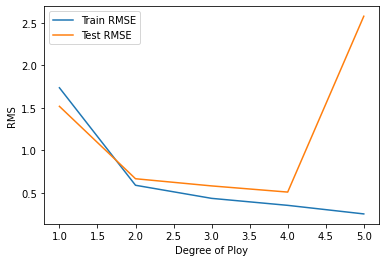

In [68]:
plt.plot(range(1,6),train_rmse_errors[:5], label ="Train RMSE")
plt.plot(range(1,6),test_rmse_errors[:5], label ="Test RMSE")

plt.xlabel('Degree of Ploy')
plt.ylabel('RMS')

plt.legend()

## Deploying the Polynomial Model

In [71]:
final_poly_conv = PolynomialFeatures(degree = 3, include_bias=False)

In [72]:
final_model = LinearRegression()

In [74]:
full_converted_X = final_poly_conv.fit_transform(X)

final_model.fit(full_converted_X, y)

LinearRegression()

In [75]:
from joblib import dump,load

In [76]:
dump(final_model,"final_poly_model.joblib") # this file will be create under "/content/"

!mv "/content/final_poly_model.joblib" "/content/drive/MyDrive/My Notebooks/MY_2022 ML DS Master Class/01-Linear Regression/"
# !ls "/content/drive/MyDrive/My Notebooks/MY_2022 ML DS Master Class/01-Linear Regression/"

In [78]:
dump(final_poly_conv,'final_converter.joblib')
!mv "/content/final_converter.joblib" "/content/drive/MyDrive/My Notebooks/MY_2022 ML DS Master Class/01-Linear Regression/"


In [86]:
loaded_converter = load("/content/drive/MyDrive/My Notebooks/MY_2022 ML DS Master Class/01-Linear Regression/final_converter.joblib")

In [87]:
loaded_model = load("/content/drive/MyDrive/My Notebooks/MY_2022 ML DS Master Class/01-Linear Regression/final_poly_model.joblib")

In [88]:
campine = [[149,22,12]]

In [91]:
transformed_data = loaded_converter.fit_transform(campine)

In [92]:
loaded_model.predict(transformed_data)

array([14.64501014])